In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR
from xgboost import XGBRegressor as XGBR
from sklearn.metrics import mean_squared_error as mse

In [2]:
mad_total = pd.read_csv('../analisis_exploratorio/mad_total_limp.csv')
mad_centro = pd.read_csv('../analisis_exploratorio/mad_int_limp.csv')
mad_exterior = pd.read_csv('../analisis_exploratorio/mad_ext_limp.csv')
alquiler = pd.read_csv('../analisis_exploratorio/alquiler_limp.csv')

In [3]:
alquiler

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq
0,4,central,arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674,1530.949664
1,0,central,arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674,1530.949664
2,0,central,arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674,1530.949664
3,4,central,arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674,1530.949664
4,0,central,arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674,1530.949664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223,1022.743902
8178,3,central,villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223,1022.743902
8179,0,central,villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223,1022.743902
8180,0,central,villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223,1022.743902


In [4]:
alquiler.distrito.value_counts()

distrito
centro                 1263
barrio de salamanca     957
noroeste                693
norte                   658
chamberi                582
chamartin               516
tetuan                  507
retiro                  299
arganzuela              298
moncloa                 264
sur                     258
hortaleza               245
fuencarral              242
ciudad lineal           207
corredor de henares     182
san blas                143
latina                  137
carabanchel             122
puente de vallecas      105
sureste                  91
villaverde               82
usera                    70
vicalvaro                70
villa de vallecas        67
suroeste                 66
barajas                  30
moratalaz                28
Name: count, dtype: int64

In [5]:
#df1 = alquiler
df1 = alquiler[alquiler['distrito']=='sureste']

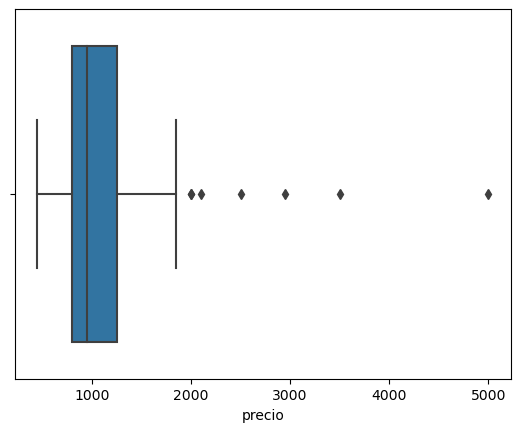

In [6]:
sns.boxplot(x=df1['precio'])
plt.show()

In [7]:
df1 = df1.drop(columns=['distrito_€/m2','€/m2','zona','distrito','media_alq','garaje'])
#df1 = df1.drop(columns=['distrito_€/m2','€/m2','media_alq'])
#df1 = df1.drop(columns=['distrito_€/m2','€/m2','media_alq','garaje','ascensor','caract'])

In [8]:
X = df1.drop('precio', axis=1)

y = df1.precio

In [9]:
X_train, X_test, y_train, y_test = tts(X, y,
                                      train_size=0.8,
                                      test_size=0.2,
                                      random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72, 6), (19, 6), (72,), (19,))

In [10]:
"""X = pd.get_dummies(X, columns=['distrito'], dtype=int, drop_first=True)

X_train = pd.get_dummies(X_train, columns=['distrito'], dtype=int, drop_first=True)

X_test = pd.get_dummies(X_test, columns=['distrito'], dtype=int, drop_first=True)"""

"X = pd.get_dummies(X, columns=['distrito'], dtype=int, drop_first=True)\n\nX_train = pd.get_dummies(X_train, columns=['distrito'], dtype=int, drop_first=True)\n\nX_test = pd.get_dummies(X_test, columns=['distrito'], dtype=int, drop_first=True)"

In [11]:
"""X = pd.get_dummies(X, columns=['zona'], dtype=int, drop_first=True)

X_train = pd.get_dummies(X_train, columns=['zona'], dtype=int, drop_first=True)

X_test = pd.get_dummies(X_test, columns=['zona'], dtype=int, drop_first=True)"""

"X = pd.get_dummies(X, columns=['zona'], dtype=int, drop_first=True)\n\nX_train = pd.get_dummies(X_train, columns=['zona'], dtype=int, drop_first=True)\n\nX_test = pd.get_dummies(X_test, columns=['zona'], dtype=int, drop_first=True)"

In [12]:
rfr = RFR(n_estimators=500, random_state=20)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse(y_test, y_pred, squared=False)

321.7728549132045

In [13]:
print(f"Test accuracy: {rfr.score(X_test, y_test):0.4f}")

Test accuracy: 0.6606


In [14]:
df1.precio.mean()

1140.3736263736264

In [15]:
mse(y_test, y_pred, squared=False)*100/df1.precio.mean()

28.21644130235089

In [16]:
dict(zip(X.columns, rfr.feature_importances_*100))

{'descripcion': 0.9926515996581549,
 'superficie': 45.27197485621897,
 'habitaciones': 44.342184509129126,
 'plantas': 8.295265870583643,
 'caract': 0.6078586236051348,
 'ascensor': 0.49006454080497075}

In [17]:
xgbr=XGBR(random_state=42)

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)

317.38763702598567

In [18]:
print(f"Test accuracy: {xgbr.score(X_test, y_test):0.4f}")

Test accuracy: 0.6698


In [19]:
df1.precio.mean()

1140.3736263736264

In [20]:
mse(y_test, y_pred, squared=False)*100/df1.precio.mean()

27.831899097427772

In [21]:
dict(zip(X.columns, xgbr.feature_importances_*100))

{'descripcion': 0.8012717,
 'superficie': 4.7338476,
 'habitaciones': 82.41664,
 'plantas': 6.675246,
 'caract': 5.019359,
 'ascensor': 0.35362875}

In [22]:
X1 = df1.drop(columns='precio')
y1 = df1.precio

In [23]:
xgbr=XGBR(random_state=42)
xgbr.fit(X1, y1)
y1_pred = xgbr.predict(X1)
mse(y1_pred, y1, squared=False)

57.21975119384231

In [24]:
dict(zip(X.columns, xgbr.feature_importances_*100))

{'descripcion': 3.815843,
 'superficie': 18.775423,
 'habitaciones': 64.60652,
 'plantas': 8.827091,
 'caract': 2.9171808,
 'ascensor': 1.0579277}

In [25]:
df1.precio.mean()

1140.3736263736264

In [26]:
print(f"Test accuracy: {xgbr.score(X1, y1):0.4f}")

Test accuracy: 0.9921


In [27]:
mse(y1_pred, y1, squared=False)*100/df1.precio.mean()

5.017631929615945